<a href="https://colab.research.google.com/github/camiyuka/Java-DIO/blob/main/atividade_IA_03_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício: Classificação de Dígitos Manuscritos com uma Rede Neural Objetivo: Construir uma rede neural para classificar dígitos manuscritos do conjunto de dados MNIST. Passos:

Importe as bibliotecas necessárias, como TensorFlow ou PyTorch, e carregue o conjunto de dados MNIST. O conjunto de dados MNIST contém imagens em escala de cinza de dígitos manuscritos de 0 a 9.
Pré-processamento de dados: • Normalize as imagens para que os valores dos pixels estejam no intervalo [0, 1]. • Converta os rótulos para o formato one-hot encoding.
Divida o conjunto de dados em conjuntos de treinamento, validação e teste. Use, por exemplo, uma proporção de 70% para treinamento, 15% para validação e 15% para teste.
Crie uma rede neural artificial simples com a seguinte arquitetura: • Uma camada de entrada com o número correto de neurônios para representar as imagens MNIST (geralmente 28x28 pixels = 784 neurônios). • Pelo menos uma camada oculta com uma quantidade de neurônios de sua escolha. • Uma camada de saída com 10 neurônios, um para cada classe de dígito de 0 a 9.
Escolha uma função de perda apropriada, como a entropia cruzada categórica (categorical cross-entropy), e um otimizador, como o Gradiente Descendente Estocástico (SGD).
Treine a rede neural usando o conjunto de treinamento e monitore o desempenho usando o conjunto de validação. Ajuste os parâmetros, como a taxa de aprendizado e o número de neurônios na camada oculta, conforme necessário.
Avalie o desempenho final da rede neural usando o conjunto de teste.



In [17]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [18]:
# carregar o dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [19]:
# pré- processamento das imagens [0,1]
# Normalização (redimensionamento de 0 a 1)
x_train = x_train.astype('float32') / 255.0

In [20]:
# One-hot encoding dos rótulos
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [21]:
# Divisão do dataset em 70% treinamento, 15% teste e 15% validação
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

In [22]:
print("Treinamento:", x_train.shape)
print("Teste:", x_test.shape)
print("Validação:", x_val.shape)

Treinamento: (42000, 28, 28)
Teste: (9000, 28, 28)
Validação: (9000, 28, 28)


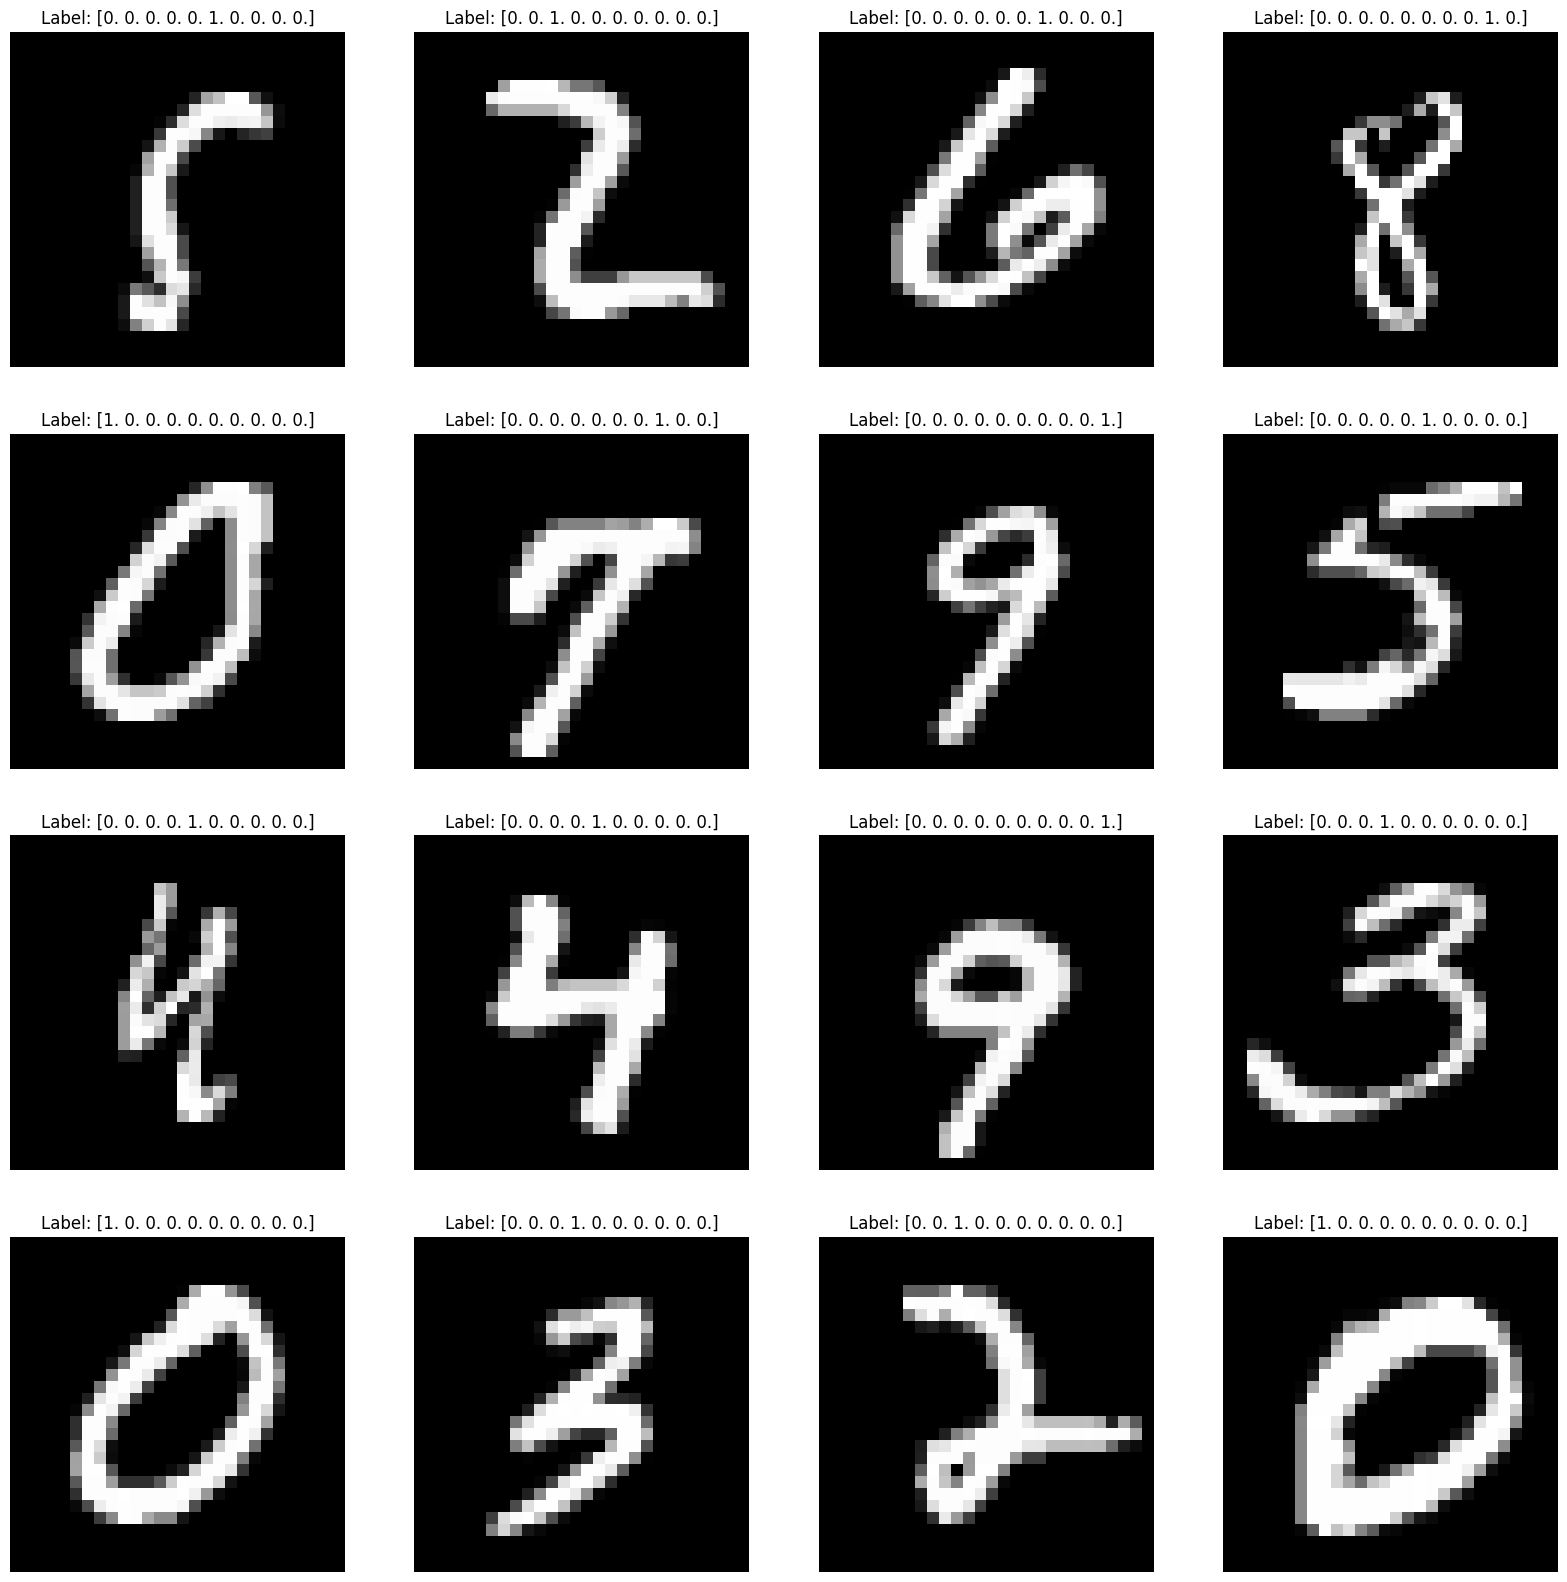

In [23]:
random_indices = np.random.choice(x_train.shape[0], 16)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[idx], cmap='gray')
  plt.title(f'Label: {y_train[idx]}')
  plt.axis('off')
plt.show()


In [24]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Crie o modelo da rede neural
model = models.Sequential()

# Camada de entrada (784 neurônios)
model.add(layers.Input(shape=(784,)))

# Camada oculta (128 neurônios) com ativação sigmoid
model.add(layers.Dense(128, activation='sigmoid'))

# Camada de saída (10 neurônios para as classes de 0 a 9)
model.add(layers.Dense(10, activation='softmax'))

# Compile o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treine o modelo
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Avalie o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_acc}')

Epoch 1/10


ValueError: ignored